## Uber Ride Sharing Analysis

We are tasked with identifying the reasons behind the increased cancellation of rides, and unavailability of cabs leading to a loss of revenue for Uber and dissatifaction for the customers. We will begin by first importing the libraries required, and loading and inspecting the dataset, including observing the shape, the first few rows, and examining the null values in the dataset.

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the dataset.
df = pd.read_csv('Uber Request Data.csv')

In [3]:
# Inspect the data.
print(f'Data Shape: {df.shape}')

Data Shape: (6745, 6)


In [4]:
# Display the first 5 rows.
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [5]:
# Inspect the data columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
# Check the null values in the Driver ID and Drop Timestamp columns.
print(f'Driver ID Null Count: {df["Driver id"].isnull().sum()}')
print(f'Drop TimeStamp Null Count: {df["Drop timestamp"].isnull().sum()}')

Driver ID Null Count: 2650
Drop TimeStamp Null Count: 3914


In [7]:
# Retrieve all the rows where the driver ID is null and Drop timestamp is null in two separate dataframes.
null_driver_ids = df[df['Driver id'].isnull()]
null_drop_timestamps = df[df['Drop timestamp'].isnull()]

In [8]:
# Check the status of the rides for both null value cases to understand why null values are present.
print(f'Unique Status Values for Null Driver ID Rows: {null_driver_ids.Status.unique().tolist()}')
print(f'Unique Status Values for Null Drop Timestamp Rows: {null_drop_timestamps.Status.unique().tolist()}')

Unique Status Values for Null Driver ID Rows: ['No Cars Available']
Unique Status Values for Null Drop Timestamp Rows: ['Cancelled', 'No Cars Available']


# Data Cleaning

Post inspecting the data above, we can make the following observations with respect to the dataset.
1. We see that null values are present in only 2 columns Driver ID and Drop Timestamp.
    - On closer inspection we observed the following:
            1. All the rows where the Driver ID was null had the status value of No Cars Available.
            2. All the rows where the Drop Timestamp was null had the status values of Cancelled and No Cars Available.
    - As these are rows that are important for analysis, it would be best to retain the rows.

Accordingly we can then take the below steps to process and clean our data.

### Cleaning Steps
1. We can cleanup the Timestamp columns, by correcting the formats, replacing the null values with the standard initial date of 1900-01-01 and then converting them to DateTime format for easier processing.
2. We then can proceed to extract additional crucial information for our analysis such as the exact Month, Date, Day and Hour of both Requests as well as Drops.
3. We can then derive an additional field for both Requests and Drops, where we categorize the hours of the day, into 5 categories as below:
    - 12 AM to 5 AM as Early Morning.
    - 6 AM to 11 AM as Morning.
    - 12 PM to 3 PM as Afternoon.
    - 4 PM to 6 PM as Evening.
    - 7 PM to 11 PM as Night.

Below we have the code to perform all the data cleaning steps in order.

In [9]:
# Clean the Drop and Request Timestamp columns.
df['Request timestamp'] = df['Request timestamp'].apply(lambda x: x.replace('/', '-'))
df['Drop timestamp'] = df['Drop timestamp'].fillna('1900-01-01 00:00:00')
df['Drop timestamp'] = df['Drop timestamp'].apply(lambda x: x.replace('/', '-'))

In [10]:
# Convert the Request and Drop Timestamps to datetime format.
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])

In [11]:
# Extract Day, Month, Year and Hour Information of Request Timestamps into different columns.
df['Request Year'] = df['Request timestamp'].dt.year
df['Request Month'] = df['Request timestamp'].dt.month
df['Request Day'] = df['Request timestamp'].dt.day
df['Request Hour'] = df['Request timestamp'].dt.hour

In [12]:
# Generate new columns to categorize the time of the day based on the hour information.
def categorize_time_of_day(hour):
    if hour in range(0,6):
        return 'Early Morning'
    elif hour in range(6,12):
        return 'Morning'
    elif hour in range(12,16):
        return 'Afternoon'
    elif hour in range(16, 19):
        return 'Evening'
    elif hour in range(19, 24):
        return 'Night'
    
df['Request Time of Day'] = df['Request Hour'].apply(categorize_time_of_day)

In [13]:
df.shape

(6745, 11)

In [14]:
# View the DataFrame again after cleaning and extracting new values for analysis.
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Year,Request Month,Request Day,Request Hour,Request Time of Day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016,11,7,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016,11,7,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016,12,7,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016,12,7,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016,7,13,8,Morning


# Data Analysis
Now that we have cleaned the data we can proceed to analyze the most pressing problems Uber is facing.

## Count Analysis.
Using a count plot we can analyze following:
1. The number of requests that have been cancelled, or dropped due to unavailability of cars.
2. The number of requests where the pickup points are from the City and the Airport.
3. The number of requests that have come through different times of the day.
4. The number of drops that have been made throughout different times of the day.

Below we have Count Plots for all the 4 scenarios listed above together with the insights that we can gain from them.

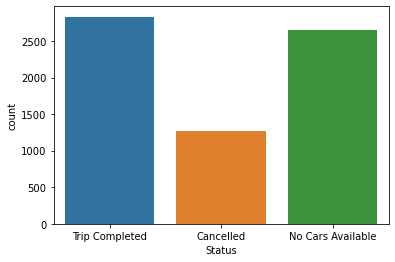

In [15]:
# Analysing the most pressing problems for Uber post data cleaning.
# Visualize the frequency of the request statuses.
sns.countplot(data = df, x = 'Status')
plt.show()

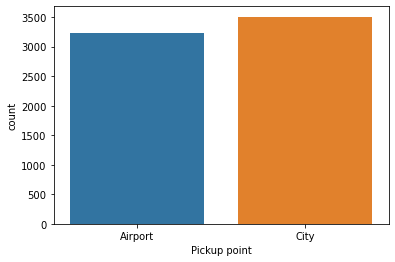

In [16]:
# Visualize the count of the pickup points to analyse which type of requests were higher.
sns.countplot(data = df, x = 'Pickup point')
plt.show()

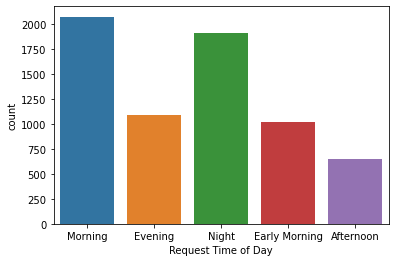

In [17]:
# Visualize the count of Request Time of Day and Drop Time of Day to see how they were distributed throughout a particular day.
sns.countplot(data = df, x = 'Request Time of Day')
plt.show()

### Count Analysis Insights.
1. We have a very high number of requests that have been dropped due to unavailability of cars than cancellations.
2. We have pickup requests coming in from both the City as and the Airport, with ones from the City being marginally higher.
3. We see that the highest count of requests are in 2 time slots of 7 PM - 11 PM and 6 AM - 11 AM.
4. We see that the highest count of drops, are coming in the early mornings, from 12 AM - 5 AM.

# Multivariate Analysis.
Next we will perform multivariate analysis using Bar Plots to uncover interesting patterns if any are present which would help increase our understanding of why we are facing increased cancellations.

1. <b>Pickup Points v/s Status:</b> Here we are analyzing which particular requests have seen the cancellations and have been dropped due to the unavailability of cars.
2. <b>Request v/s Status v/s Time of Day:</b> Here we are analyzing the frequency of requests throughout which time of day have seen the highest cancellations, or have been dropped due to the unavailability of cars.
3. <b>Request v/s Pickup Points v/s Time of Day:</b> Here we are analyzing the frequency of requests throughout the times of the day across all the pickup locations.

Below we have the plots that describe each of the analysis scenarios listed above in order.

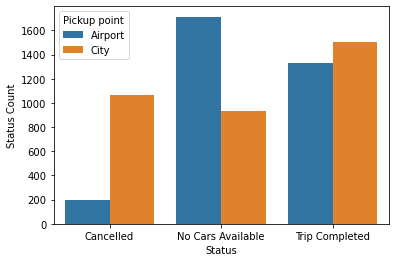

In [18]:
# Plot the statuses and the request types together to see which requests presented the most problems for Uber.
sns.barplot(data = df.groupby(['Status', 'Pickup point']).size().to_frame('Status Count').reset_index(),
            x = 'Status', y = 'Status Count', hue = 'Pickup point')
plt.show()

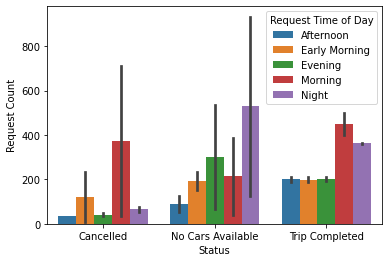

In [19]:
# Visualize how the requests for the cabs are distributed throughout the times of day, for all status types.
sns.barplot(data = df.groupby(['Status', 'Pickup point', 'Request Time of Day']).size().to_frame('Request Count').reset_index(),
            x = 'Status', y = 'Request Count', hue = 'Request Time of Day')
plt.show()

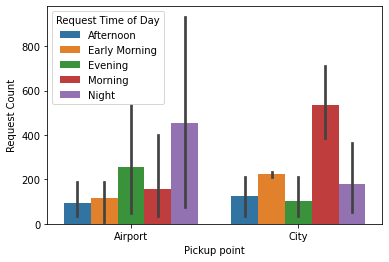

In [20]:
# Visualize the how the requests are distributed throughout the different times of the day at the 2 pickup locations.
sns.barplot(data = df.groupby(['Status', 'Pickup point', 'Request Time of Day']).size().to_frame('Request Count').reset_index(),
            x = 'Pickup point', y = 'Request Count', hue = 'Request Time of Day')
plt.show()

## Multivariate Analysis Insights.
1. We can see that the biggest problem Uber is facing is <b>unavailability of cars at the airports.</b>
2. We observe that the <b>highest number of cancelled requests are coming in the time range from 6 AM - 11 AM.</b>
3. We observe that the <b>highest number of rides that have been dropped due to the unavailability of cars is in the time range from 7 PM - 11 PM.</b>
4. We observe that <b>there is very high demand for cabs to the Airport at night from 7 PM - 11 PM.</b>
5. We observe that <b>there is very high demand for cabs to the City in the morning from 6 AM - 11 AM.</b>

# Supply v/s Demand Analysis

As we can see from the above bar plots, the biggest problem Uber is facing is the non-availability of cabs at the airports, at night from 7 PM - 11 PM. The second major problem is that driver cancellation occurrs to requests from the City to the Airport in the mornings from 6 AM - 11 AM. We can conclude that the biggest demand for the cabs are in those two time slots.

With this information at hand, we can further drill down within our dataset to analyze the requests by the hour, to get more detailed information at a granular level. First we can go ahead and calculate the necessary variables such as demand, supply etc below.

We can then use line plots to observe the exact nature and trend of the supply of drivers through the hours of the day correspondingly with the number of requests raised by the customers.

In [35]:
# Let us find out some useful information from the dataset that might help with the observations in demand and supply.
total_drivers = df['Driver id'].nunique()
total_requests = df['Request id'].nunique()
total_booking_days = df['Request Day'].nunique()
per_day_demand = np.round(total_requests / total_booking_days)
per_day_supply = np.round(total_drivers / total_booking_days)
drivers_available_per_request = np.round(total_requests / total_drivers)

print(f'Total Available Drivers: {total_drivers}')
print(f'Total Requests Booked: {total_requests}')
print(f'Total Number of Days Cabs were booked: {total_booking_days}')
print(f'Total Cab Demand per day: {per_day_demand}')
print(f'Total Driver Supply per day: {per_day_supply}')
print(f'Average Drivers Available per request: {drivers_available_per_request}')

Total Available Drivers: 300
Total Requests Booked: 6745
Total Number of Days Cabs were booked: 4
Total Cab Demand per day: 1686.0
Total Driver Supply per day: 75.0
Average Drivers Available per request: 22.0


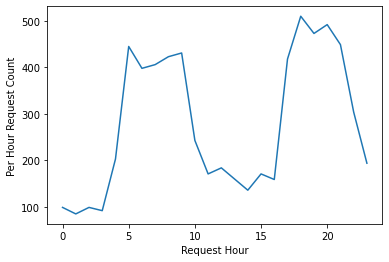

In [36]:
# Let us plot and visualize the information we have obtained.
# First we can plot how the requests flowed into the app by the hour to observe the demand.
sns.lineplot(data = df.groupby(['Request Hour']).size().to_frame('Per Hour Request Count').reset_index(),
             x = 'Request Hour', y = 'Per Hour Request Count')
plt.show()

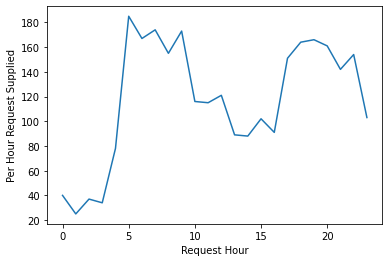

In [37]:
# Let us filter out only the rows where the trips have been successfully completed,
# and observe the requests fulfilled per hour.
trips_completed_df = df[df['Status'] == 'Trip Completed']
sns.lineplot(data = trips_completed_df.groupby(['Request Hour']).size().to_frame('Per Hour Request Supplied').reset_index(),
             x = 'Request Hour', y = 'Per Hour Request Supplied')
plt.show()

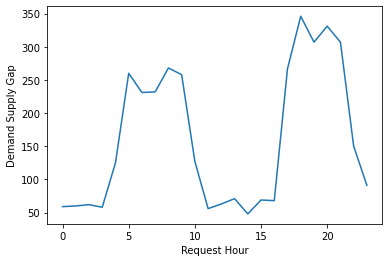

In [62]:
# Now that we have the observations of demand and supply throughout the hour, we can calculate the difference
# which essentially becomes the Demand - Supply Gap.
demand = df.groupby(['Request Hour']).size().to_frame('Demand')
supply = trips_completed_df.groupby(['Request Hour']).size().to_frame('Supply')
demand_supply_gap = demand['Demand'] - supply['Supply']

sns.lineplot(data = demand_supply_gap.to_frame('Demand Supply Gap').reset_index(),
             x = 'Request Hour', y = 'Demand Supply Gap')
plt.show()

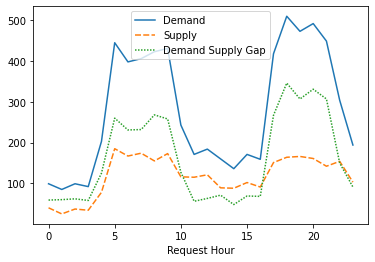

In [64]:
# Let us combine everything into a single dataframe and plot it together to visualize it better.
demand_supply_gap_df = pd.concat([demand, supply, pd.DataFrame(demand_supply_gap, columns = ['Demand Supply Gap'])], axis = 1)
sns.lineplot(data = demand_supply_gap_df)
plt.show()

We can clearly see above that there is a massive gap between the demand and the supply in those morning and the night windows. Line plots allow us to look at the trend of data over time periods, enabling us to look at current trends as well as get an amazing idea of behaviour of variables, so we can forecast them for the future.

# Further Investigations and Recommendations.

The supply demand analysis above enables us to closely understand the data behind the problem statement at hand and to think of further questions that would enable us to come to an even more concrete conclusion.

Here are some areas we can investigate further:
1. <b>Airport - City Proximity: </b>A potential reason for cancellations by drivers could be the distance between the two locations. Is the airport located further away from the city or is it nearer ?
2. <b>Traffic Data: </b>As we are seeing a high number of cancellations to airport drops in the mornings, high traffic congestions in the routes to the airport could indicate a potential reason for cancellation.
3. <b>Flight Data: </b>Flight data can be a great source of data to forecast cab demands to and from the airport. As we are seeing many cancellations in the morning, a potential reason could be increased driver wait time for pickups from the airport. Lesser flights arriving at that particular time, would mean very long driver wait times, leading to driver cancellation.
4. <b>City Request Location Data: </b>Observing the location data within the city where the request to the airport is made could provide a potential clue, so cabs can be tailored to be available within such specific locations to the city should the need arise.
5. <b>Driver Logout Time: </b>As we are seeing a lot of unavailability of cabs at night at the airport, a potential reason could be that the drivers during that time would be winding up for the day.

## Recommendations and Potential Solutions.
1. Use flight data to potentially forecast the demand for cabs, and adjust the cab presence accordingly by recommending trips to drivers that are nearer to the airport location beforehand thereby reducing driver proximity to the airport.
2. Using the same flight data, we can also ensure driver wait times at the airport are reduced, by recommending them trips nearer to the airport location when there are more number of flights arriving to the city.
3. Incentivizing the drivers who take airport trips at night, by either allowing them to take the following day off, or start late, or with a bonus for every such trip, or once in 3 trips etc could be attempted.
4. A small separate line of cars, that would ferry multiple people to the airport from specific locations where the request to the airport is high, could help to meet the increased demand while at the same time reducing traffic congestion on routes to the airport by preventing a higher volume of cars being on the road at the same time.